In [2]:
import geopandas
import contextily as cx

On prend l'exemple des quartiers de New York

Le graphe de base il est comme suit 

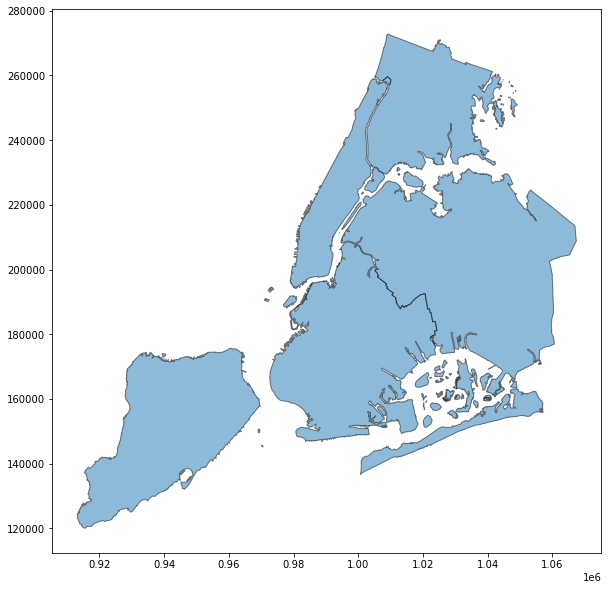

In [3]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### Comment ajouter un fond à la carte

En premier lieu, il faudrait s'assurer du système de coordonnées utilisé, habituellement les web map qu'on retrouve utilise la CRS EPSG 3857

In [4]:
df_wm = df.to_crs(epsg=3857)

Alors on ajoute juste une basemap (une map de base sur laquelle notre plot se mettra) et cela grace à contextly

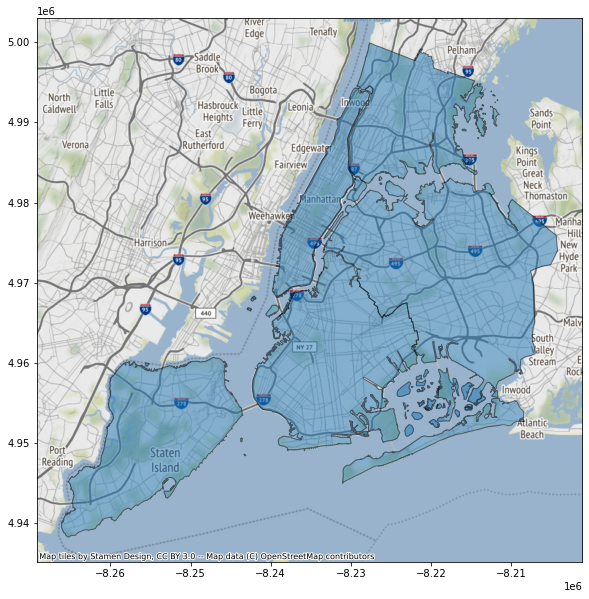

In [5]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

On peut néanmoins adapter la basemap au CRS de base

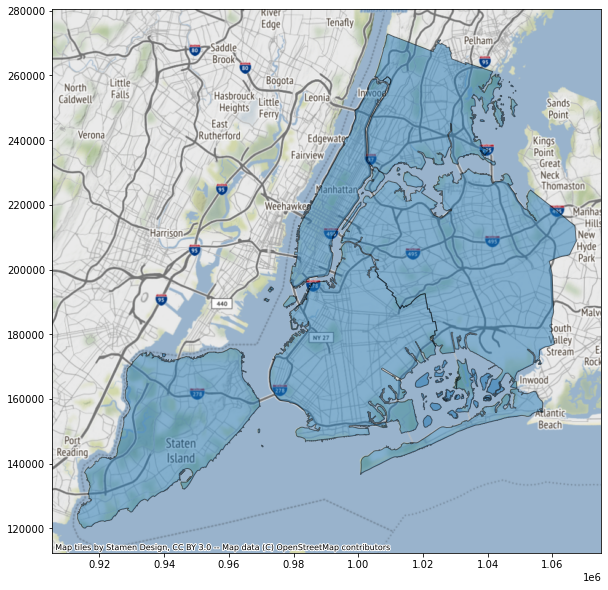

In [7]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=df.crs)

### Contrôle du niveau de détail

On peut rajouter au basemap une variable zoom qui permettra de juger la quantités de détails à ajouter

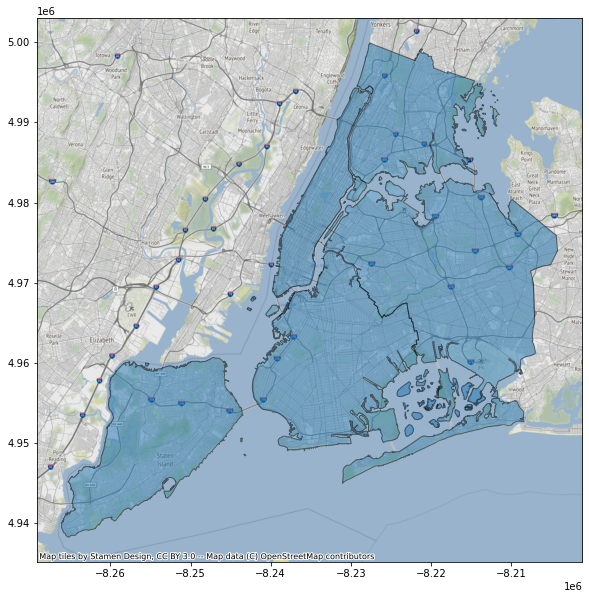

In [6]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, zoom=12)

### Choix du style

On choisi à travers cx.providers et on prend le thème qu'on veut

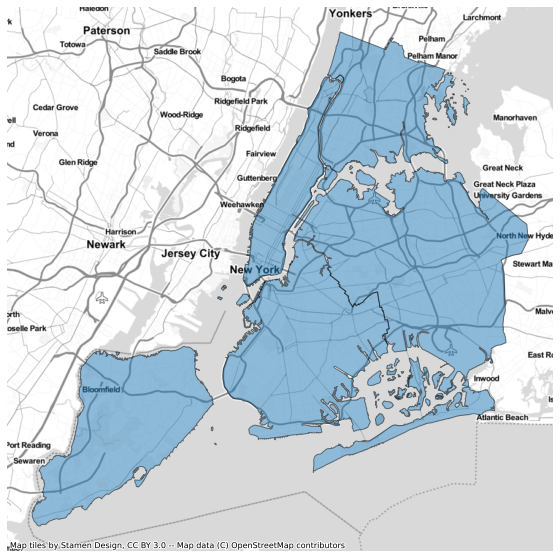

In [8]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()

### Ajout des label en surcouche

On peut remarquer sur le graphe précédent que les labels viennent en dessous de notre plot, avec contextly et aussi les cx.providers on peut mettre les labels au dessus de notre plot comme suit :

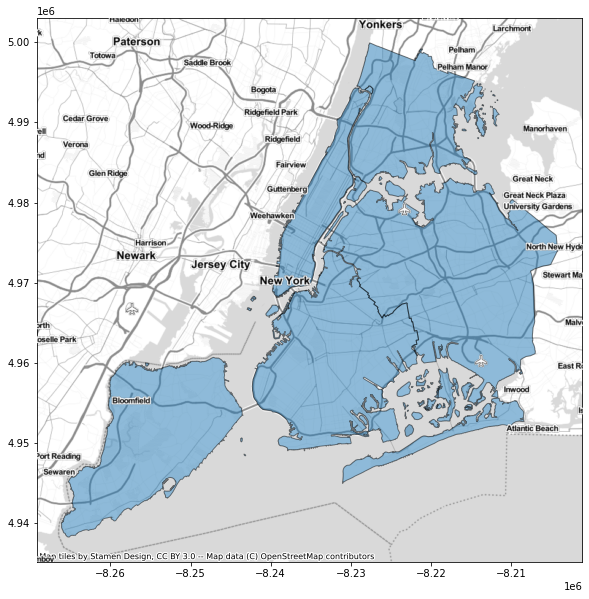

In [9]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels) # Les labels qui seront en surchouche

En séparant les couches comme on a fait on peut gérer le niveau de détails de chaque couche

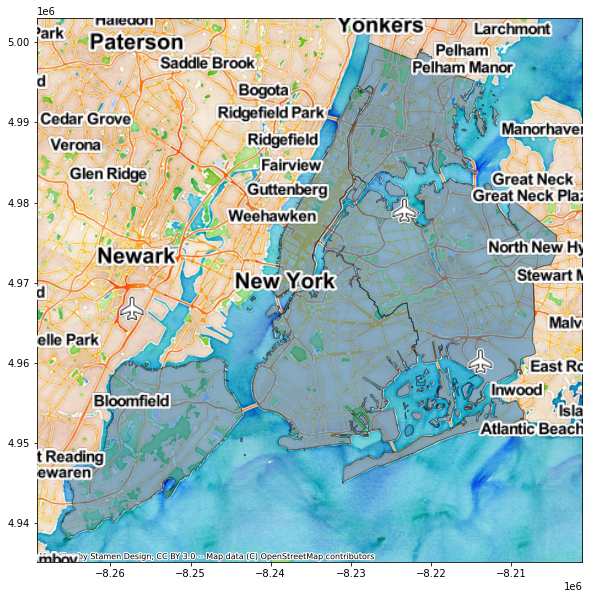

In [10]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=10)